<a href="https://colab.research.google.com/github/tewei0328/teach-visulization/blob/main/viz8_finmind_stock_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

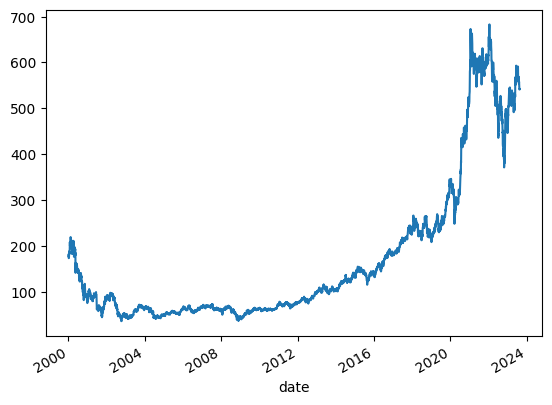

In [2]:
# 取得資料
# backtesting強制要求欄位名稱格式， 所以需要先轉換欄位名稱
# https://finmindtrade.com/analysis/#/data/document

import datetime
import warnings

import pandas as pd
import requests


# 1-參數設定
stock_index = '2330'
csvFileName = stock_index + '.csv'
start_date = datetime.datetime(2000, 1, 1, 0, 0).strftime("%Y-%m-%d")
end_date = datetime.datetime(2023, 8, 16, 0, 0).strftime("%Y-%m-%d")

# 2-爬蟲
url = "https://api.finmindtrade.com/api/v4/data"
parameter = {
    "dataset": "TaiwanStockPrice",
    "start_date": start_date,
    "end_date": end_date,
    "data_id": stock_index,
}

data = requests.get(url, params=parameter)
data = data.json()

# 3-爬蟲所得存入pandas dataframe
pd.set_option("display.max_columns", None)
df1 = pd.DataFrame(data["data"])

df1.index = pd.to_datetime(df1["date"])
df1.rename(
    columns={
        "Trading_Volume": "Volume",
        "open": "Open",
        "max": "High",
        "min": "Low",
        "close": "Close",
    },
    inplace=True,
)

df1.drop(
    columns=["stock_id", "date", "Trading_money", "spread", "Trading_turnover"],
    inplace=True,
)

# 4-將pandas劃圖, 並存入csv
df1.head()
df1['Close'].plot()
df1.to_csv(csvFileName)